## Problem Statement:Lending Club Case Study
-If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company          
-If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
Therefore finding the fetures/characterstics of a Barrower who are likely to default will be our alalysis aim.

In [8]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Read CSV file and check it's attributes before proceeding further.
loan_data = pd.read_csv("loan.csv")

In [4]:
#Checking shape of data
loan_data.shape

(39717, 111)

In [5]:
#checking data type of loan data
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [6]:
# checking the number of columns and data info 
print(loan_data.info())
loan_data.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning:

In [7]:
#Let's first find out column which has null values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
#check how many number of columns have all missing values
 
print(loan_data.isnull().all(axis=0).sum())

54


In [14]:
#check how many number of rows have all missing values
print(loan_data.isnull().all(axis=1).sum())

0


Observation: Number of empty rows = 0                                                                                       
    Number of empty column = 54

In [16]:
#let's drop the columns where all the values of the column are null values
loan_data.drop(loan_data.iloc[:, 53:105], inplace = True, axis = 1) 

In [17]:
loan_data.shape

(39717, 59)

Now we are left with 59 columns

In [18]:
# check what are all the other columns which are mostly nulls
(loan_data.isna().sum()/len(loan_data.index))*100

id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        6.191303
emp_length                       2.706650
home_ownership                   0.000000
annual_inc                       0.000000
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            32.580507
purpose                          0.000000
title                            0.027696
zip_code                         0.000000
addr_state                       0

From the above results we can delete columns which are mostly null and we don't require them for our analysis

In [ ]:
#drop the columns which are mostly null
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan_data.drop(labels = columns_drop_list1, axis =1, inplace=True)
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan_data.drop(labels = columns_drop_list2, axis =1, inplace=True)
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan_data.drop(labels = columns_drop_list3, axis =1, inplace=True)

In [22]:
# let's look at the shape of the data after droping the columns which were holding no value in oue analysis
loan_data.shape

(39717, 45)

Observation: After removing all our unnecessary columns now we are left with 45 columns

In [25]:
# Lets format employment length column to have only numbers. It may play important role in analysis further.

loan_data.emp_length.fillna('0',inplace=True)
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)')

In [26]:
# after having only numbers in employement lenth column lets look at the head columns
loan_data.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0


In [27]:
# Again check if any column still contains null values
(loan_data.isna().sum()/len(loan_data.index))*100

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
title                         0.027696
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                

Observation: From the above results "pub_rec_bankruptcies" column still having many  missing values so this also should be removed 

In [28]:
#cleaning pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

In [29]:
# after cleaning pub_rec_bankruptcies  lets see wheather all null values all cleared or not 
loan_data.pub_rec_bankruptcies.isnull().sum()

0

Observation: All the null values has been removed

In [30]:
# inorder to use the columns in calculations let's remove % symbol from intrest rate column revol_util column
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')

In [31]:
#Let's convert columns into numeric data
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_data[cols1] = loan_data[cols1].apply(pd.to_numeric)

In [32]:
# First lets take a look at loan status
(loan_data.loan_status.value_counts()*100)/len(loan_data)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Obesrvations: the above are the percentage value without percentage symbol 

In [34]:
#let's look at the pupose of the loan taken 
(loan_data.purpose.value_counts()*100)/len(loan_data)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Obesrvation: The loan taken mainly for debt_consolidation i.e almost 47%

Text(0, 0.5, 'loan amount')

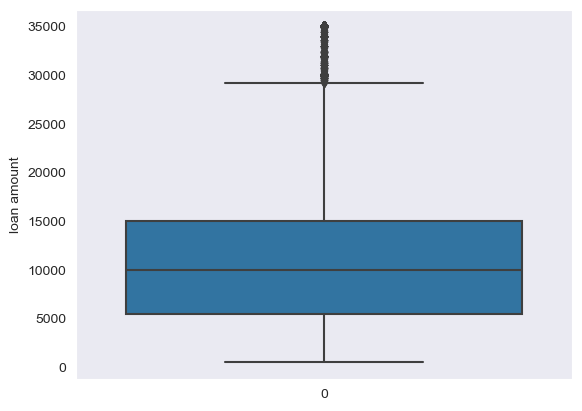

In [73]:
# let's see if the data contains outliner
sns.boxplot(loan_data.loan_amnt)
plt.ylabel("loan amount")

Observation:
    There are clearly presence of outliners in the loan amount column

Text(0, 0.5, 'total payment')

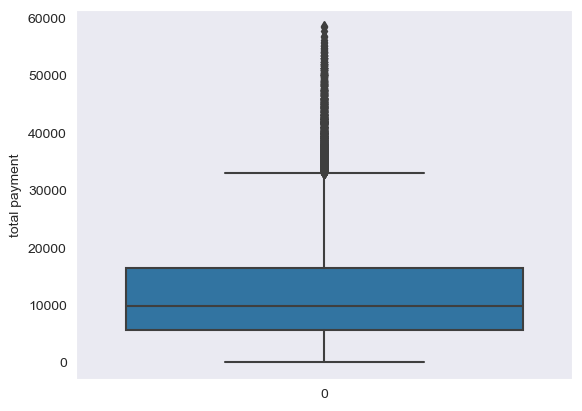

In [76]:
sns.boxplot(loan_data.total_pymnt)
plt.ylabel("total payment")

In [77]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(loan_data['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan_data["annual_inc"].describe())

Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


# Univariate Analysis:

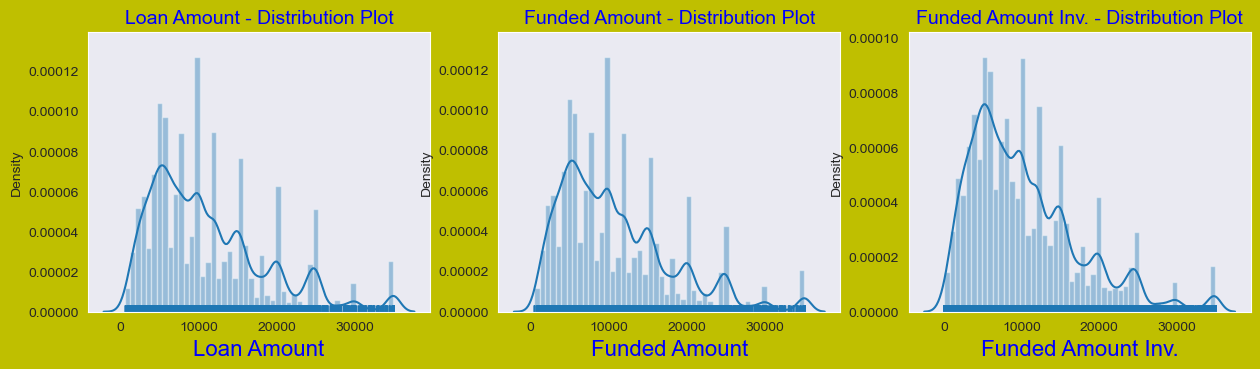

In [41]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=16,color='b')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_data['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount',fontsize=16,color='b')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_data['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=16,color='b')
plt.show()

Observation:                                                                                                                 
    -Distribution of all three plots lokks similar                                                                           
    -we will use loan amount graph for rest of the analysis

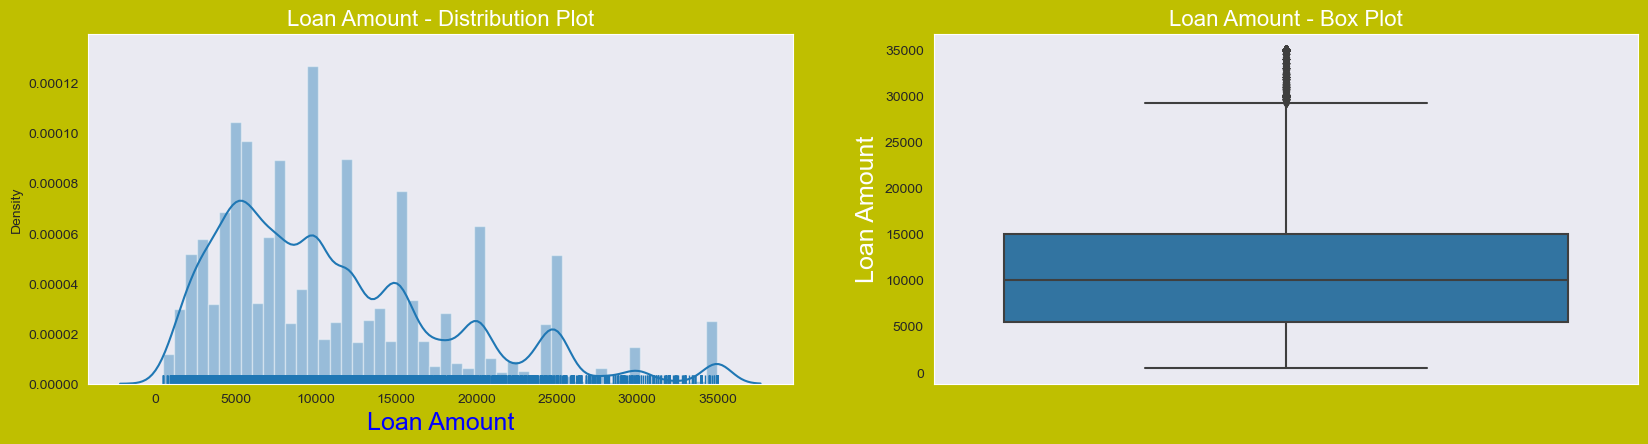

In [48]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(20,10),facecolor='y')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=18,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=18,color='w')
plt.show()

Observation:                                                                                                                 
    - Most of the loan amount are in the range of 5000 - 15000                                                               
    - there are some outliners are also present

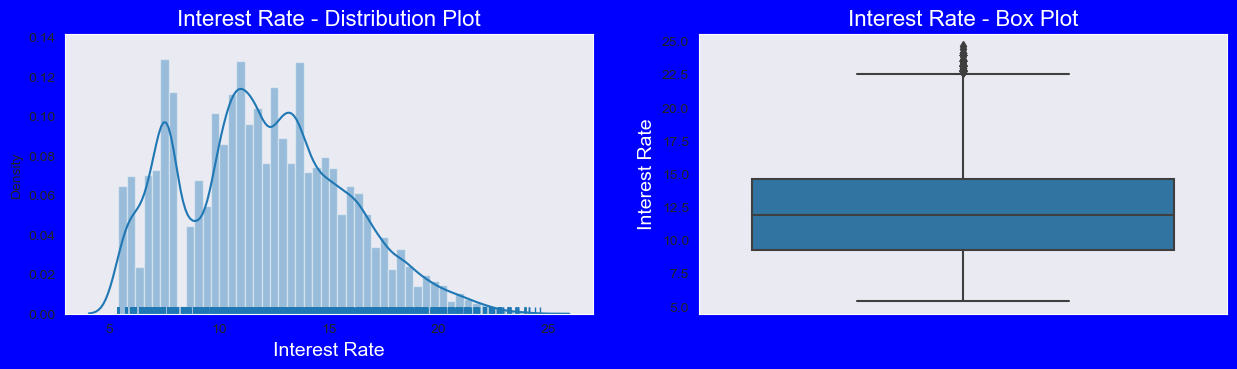

In [50]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

Observation:
    - Most of the interest rates are in the range of 10% - 15%
    

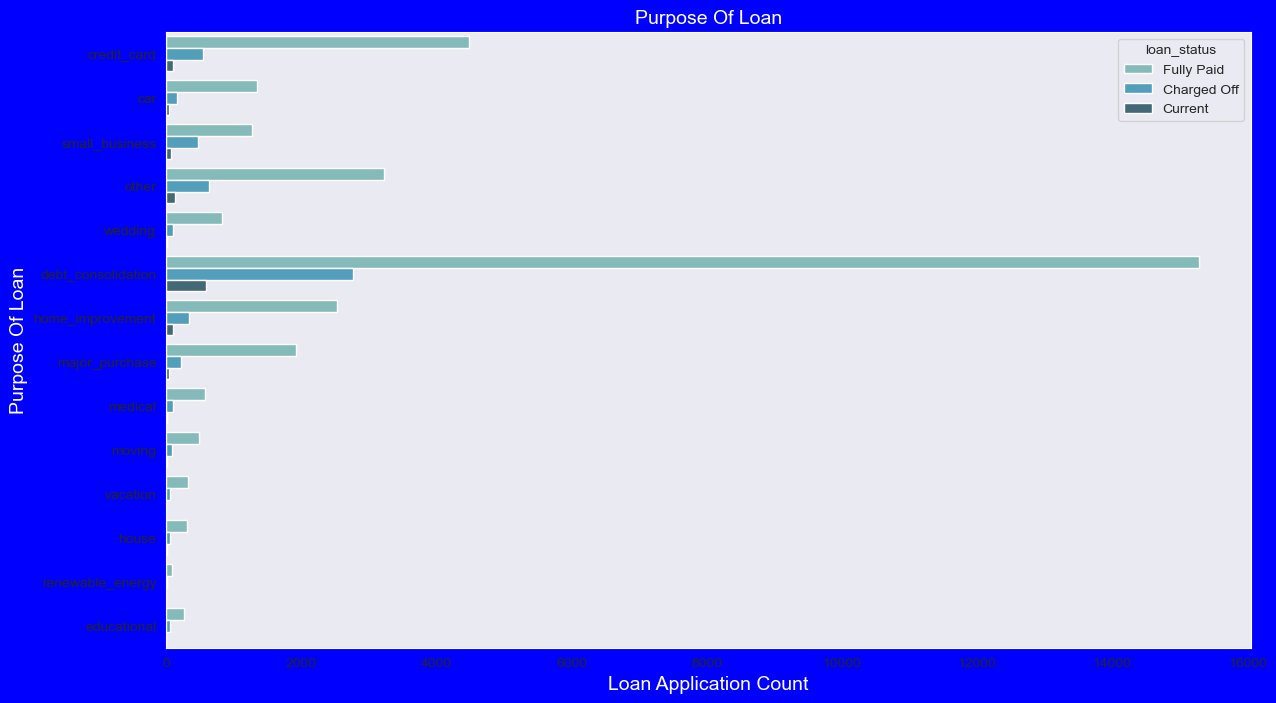

In [57]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

Observations :                                                                                                                  

-Above plot shows that most of the loans were taken for the purpose consolidation, credit card, home improvement and major purchase.             

-Number of chraged off count also high too for these loans.


In [63]:
# let's derive some columns for the analysis 
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['year']=loan_data['issue_d'].dt.year
loan_data['month']=loan_data['issue_d'].dt.month


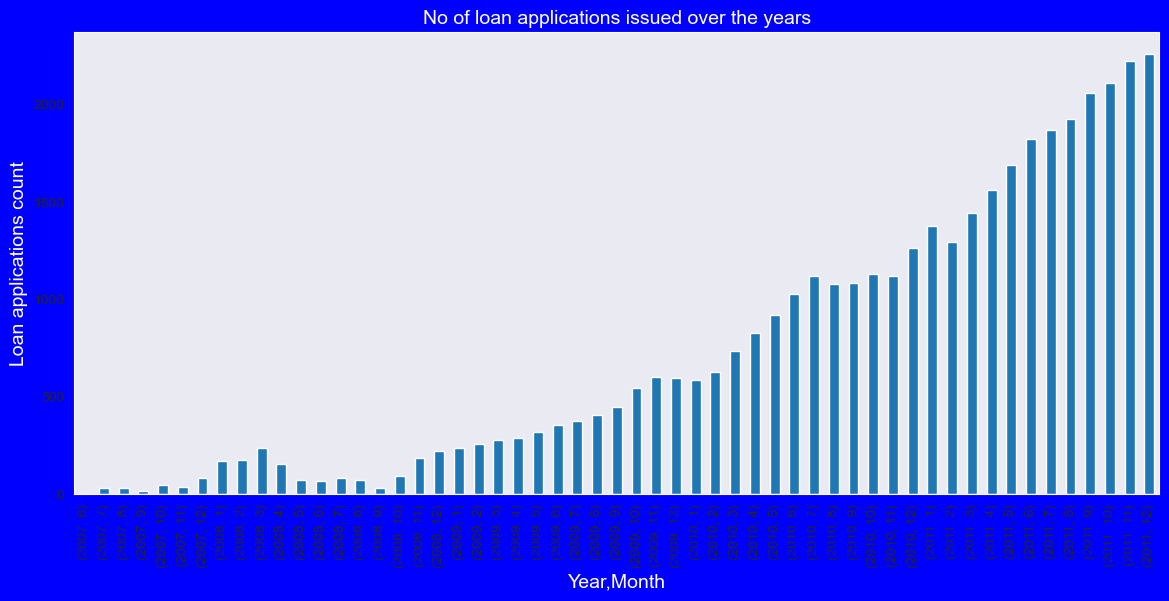

In [65]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='b')
loan_data.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

Observation:                                                                                                                     

    -The count of loan application is increasing every passing year.                                                             
    
     -There is increase in number of loan applications are adding more to number of charged off applications.                   
     
     - Number of loans issued in 2008( May-October) got dipped, may be due to Recession.
     

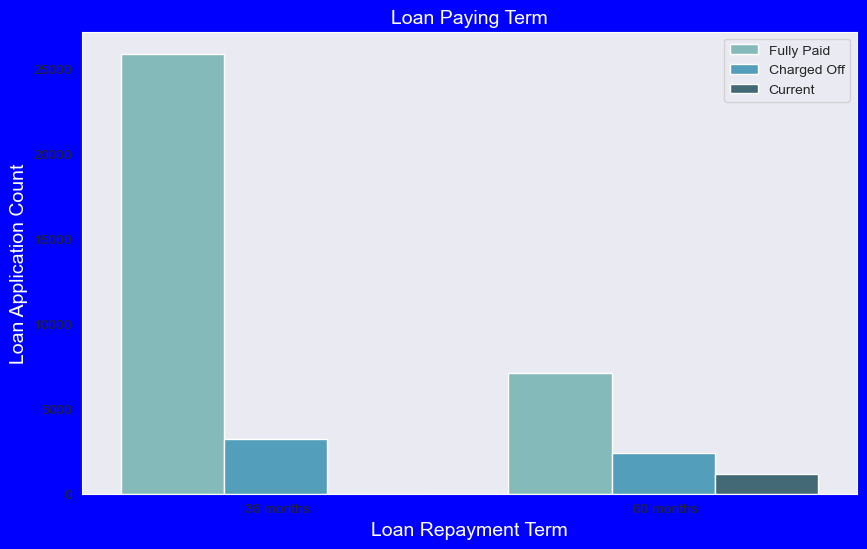

In [67]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Observations :
- Above plot shows that those who had taken loan to repay in 60 months had more  percentage number of applicants becoming default compared to applicants who had taken loan for 36 months.

## Bivariate Analysis

In [78]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


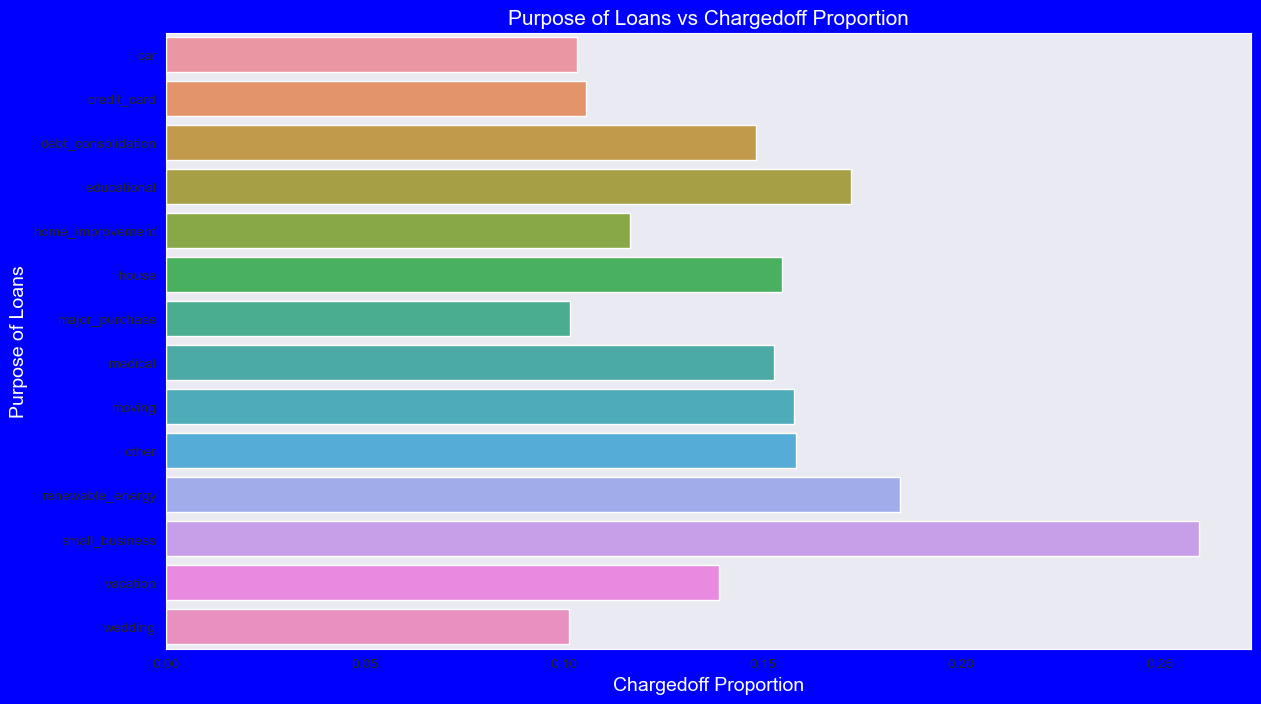

In [80]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


Observations:
    
 -Small Business applicants have high chnaces of becoming default.                                                        

- Renewable_energy where defaulted proportion is higher as compare to other categories.

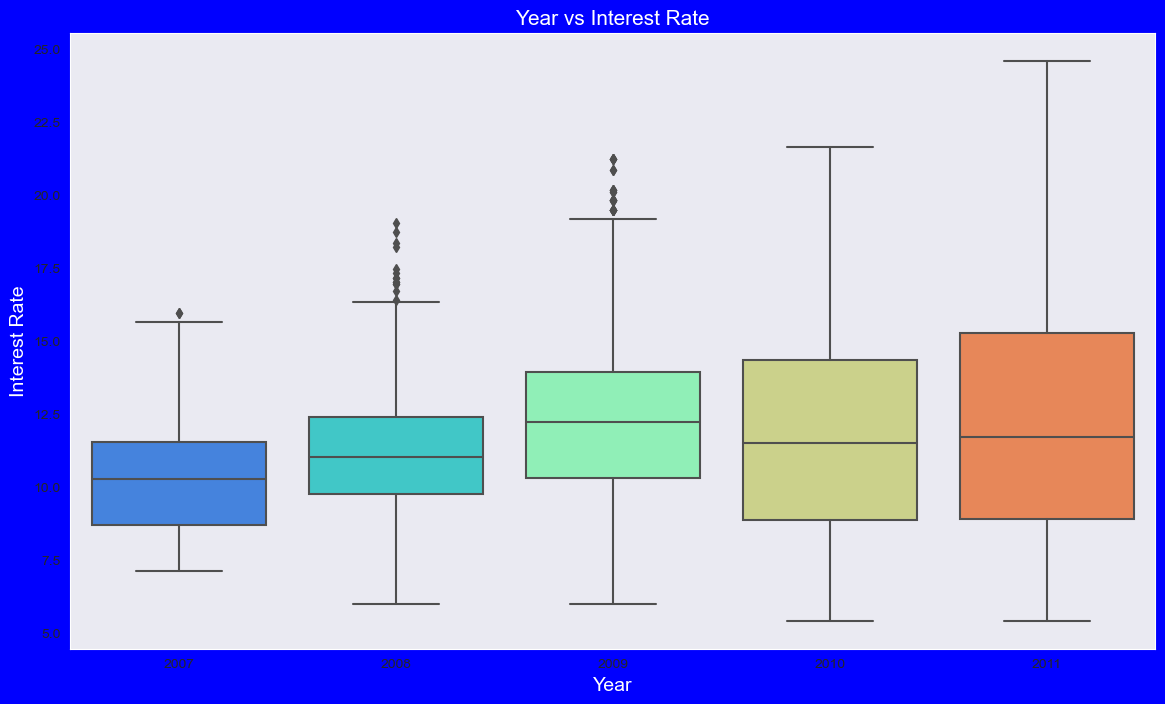

In [82]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()


Observations:
Plot shows intrest rate is increasing slowly with increase in year.

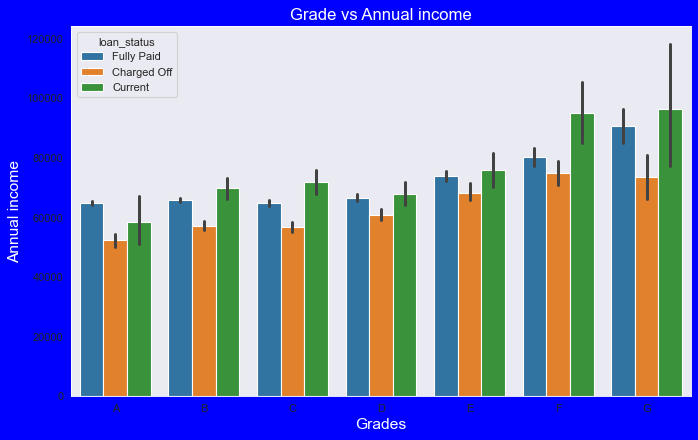

In [83]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()


Observations:
From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
who'paid fully' for each and every grade (i.e. at same interest range)

In [85]:
 #let's derive some more column for the analysis

# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

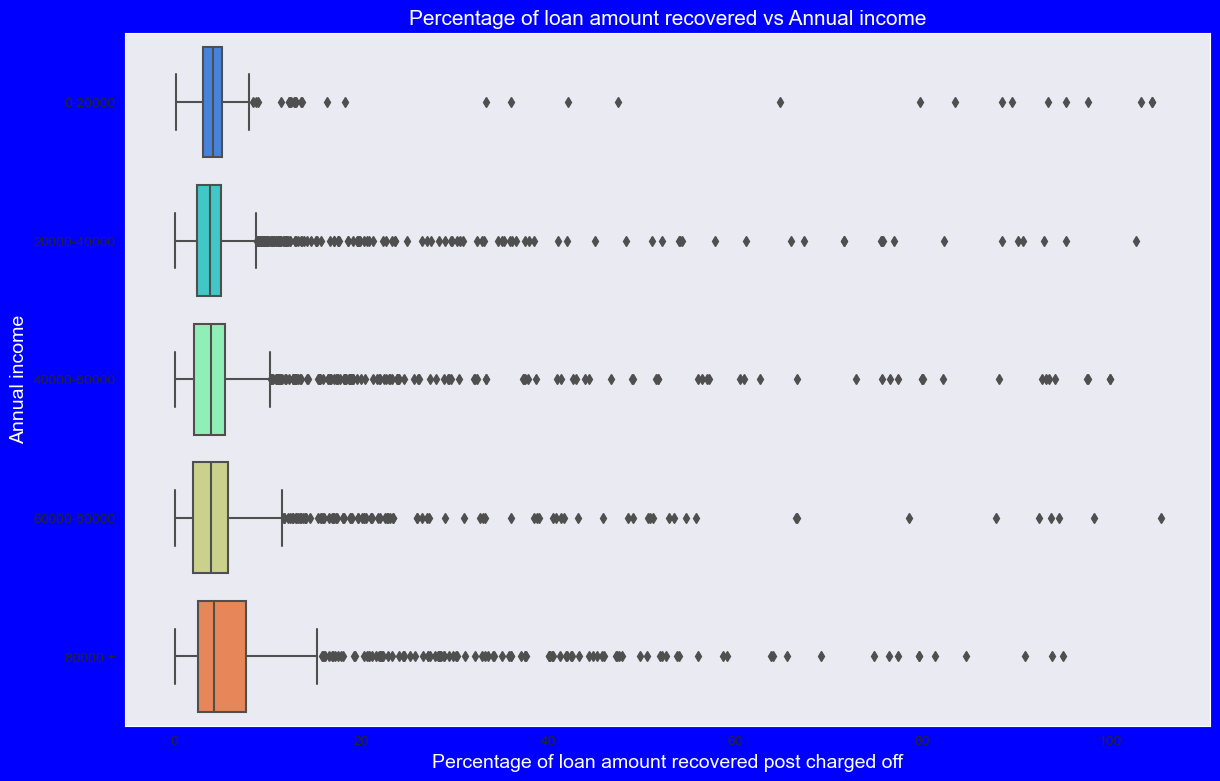

In [86]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan_data['recoveries']=pd.to_numeric(loan_data['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='b')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plt.show()

Observations:                                                                                                                   

Higher percentage of loan amount is recovered when annual income is high.                                                       

Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

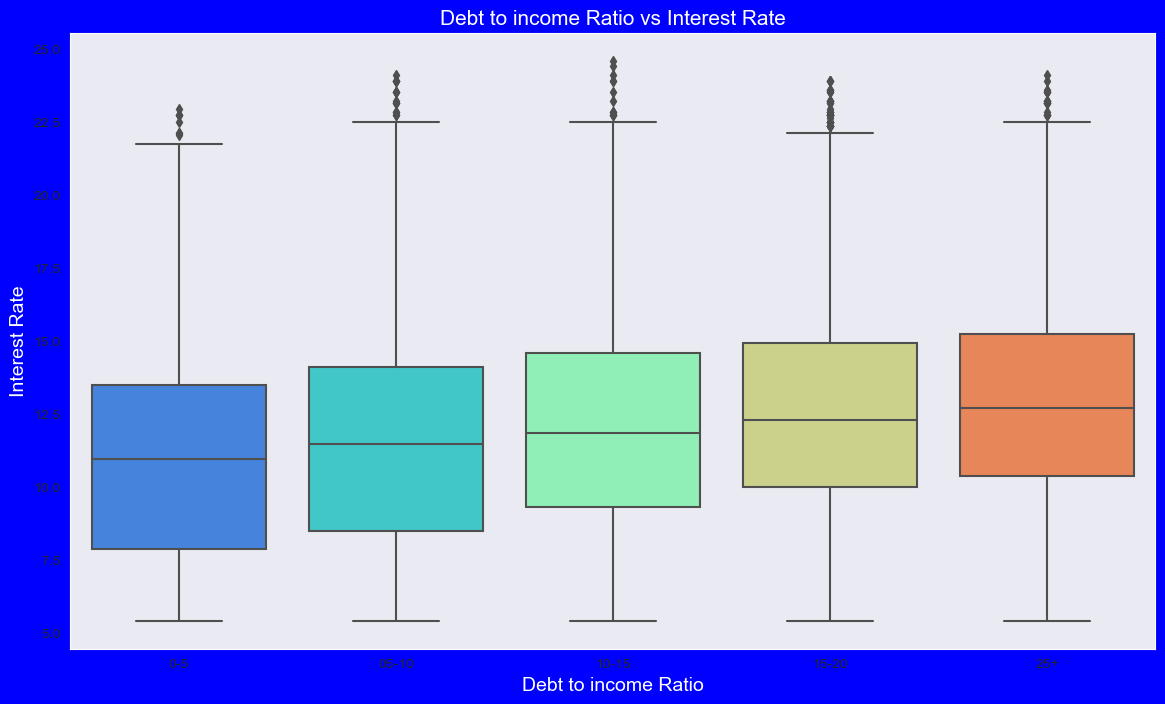

In [87]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

Observations:                                                                                                                
If your DTI is low enough you may get a lower interest rate.                                                                 
Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

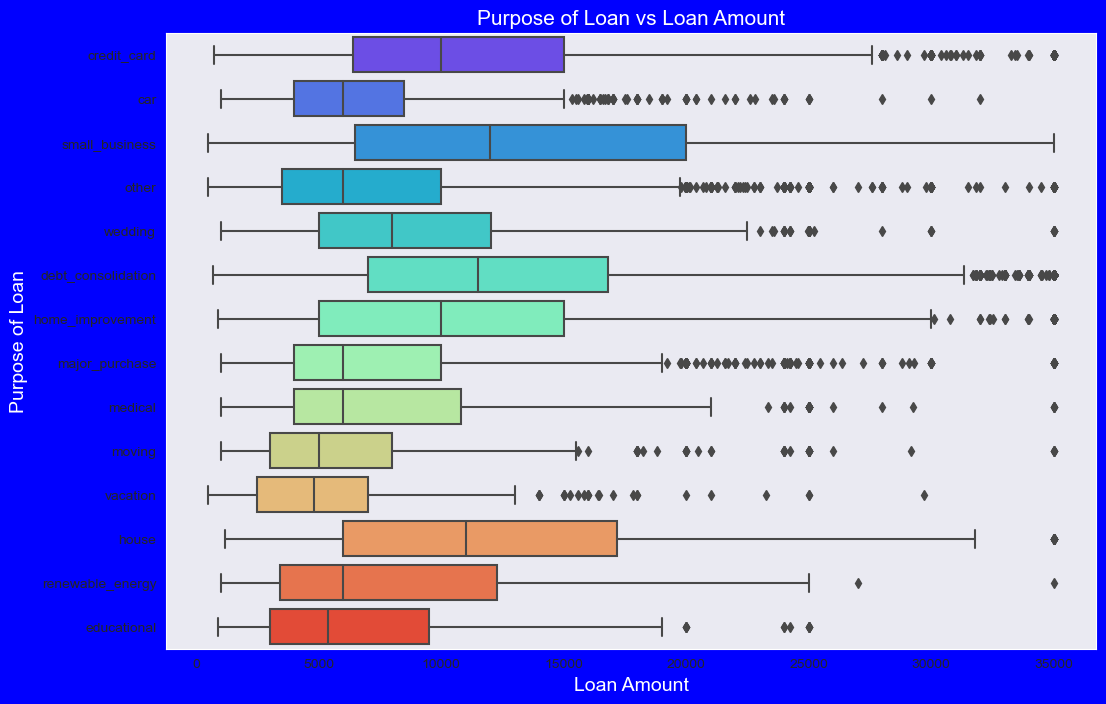

In [89]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan_data,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()


Observations:                                                                                                               
Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
Debt consolidation is second and Credit card comes 3rd.

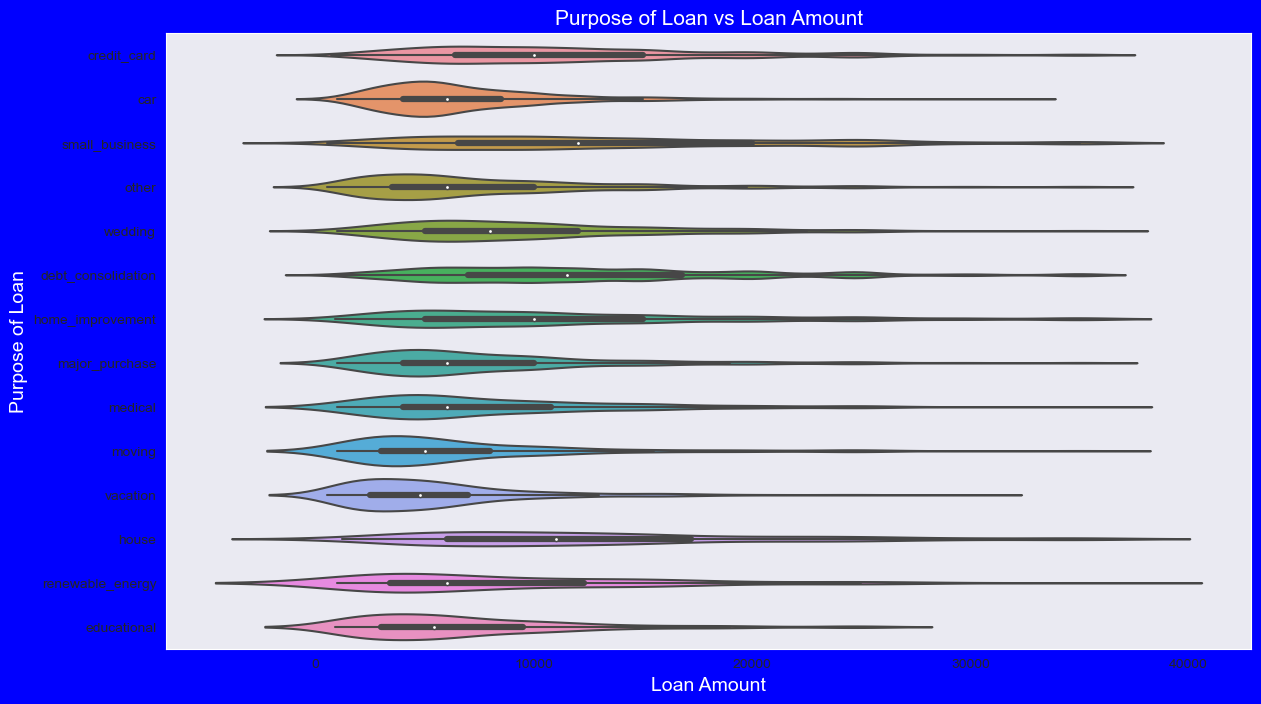

In [90]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan_data)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

Observations:                                                                                                             
Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed                    
as compare to loan taken for other purposes

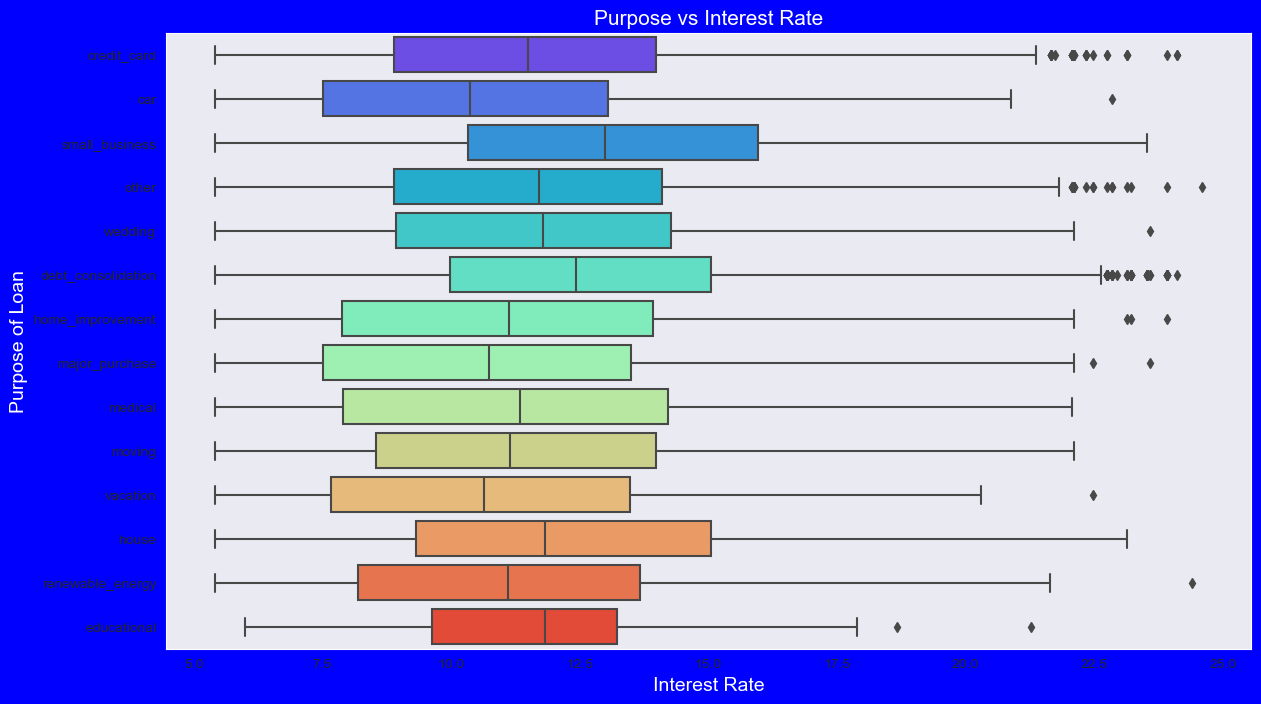

In [91]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_data,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

Observations:                                                                                                                 
It is clear that avearge intrest rate is highest for small business purpose.                                                 
Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.                    
Debt consolidation is 2nd where borrowers had to pay more interest rate.

## Multivariate Analysis

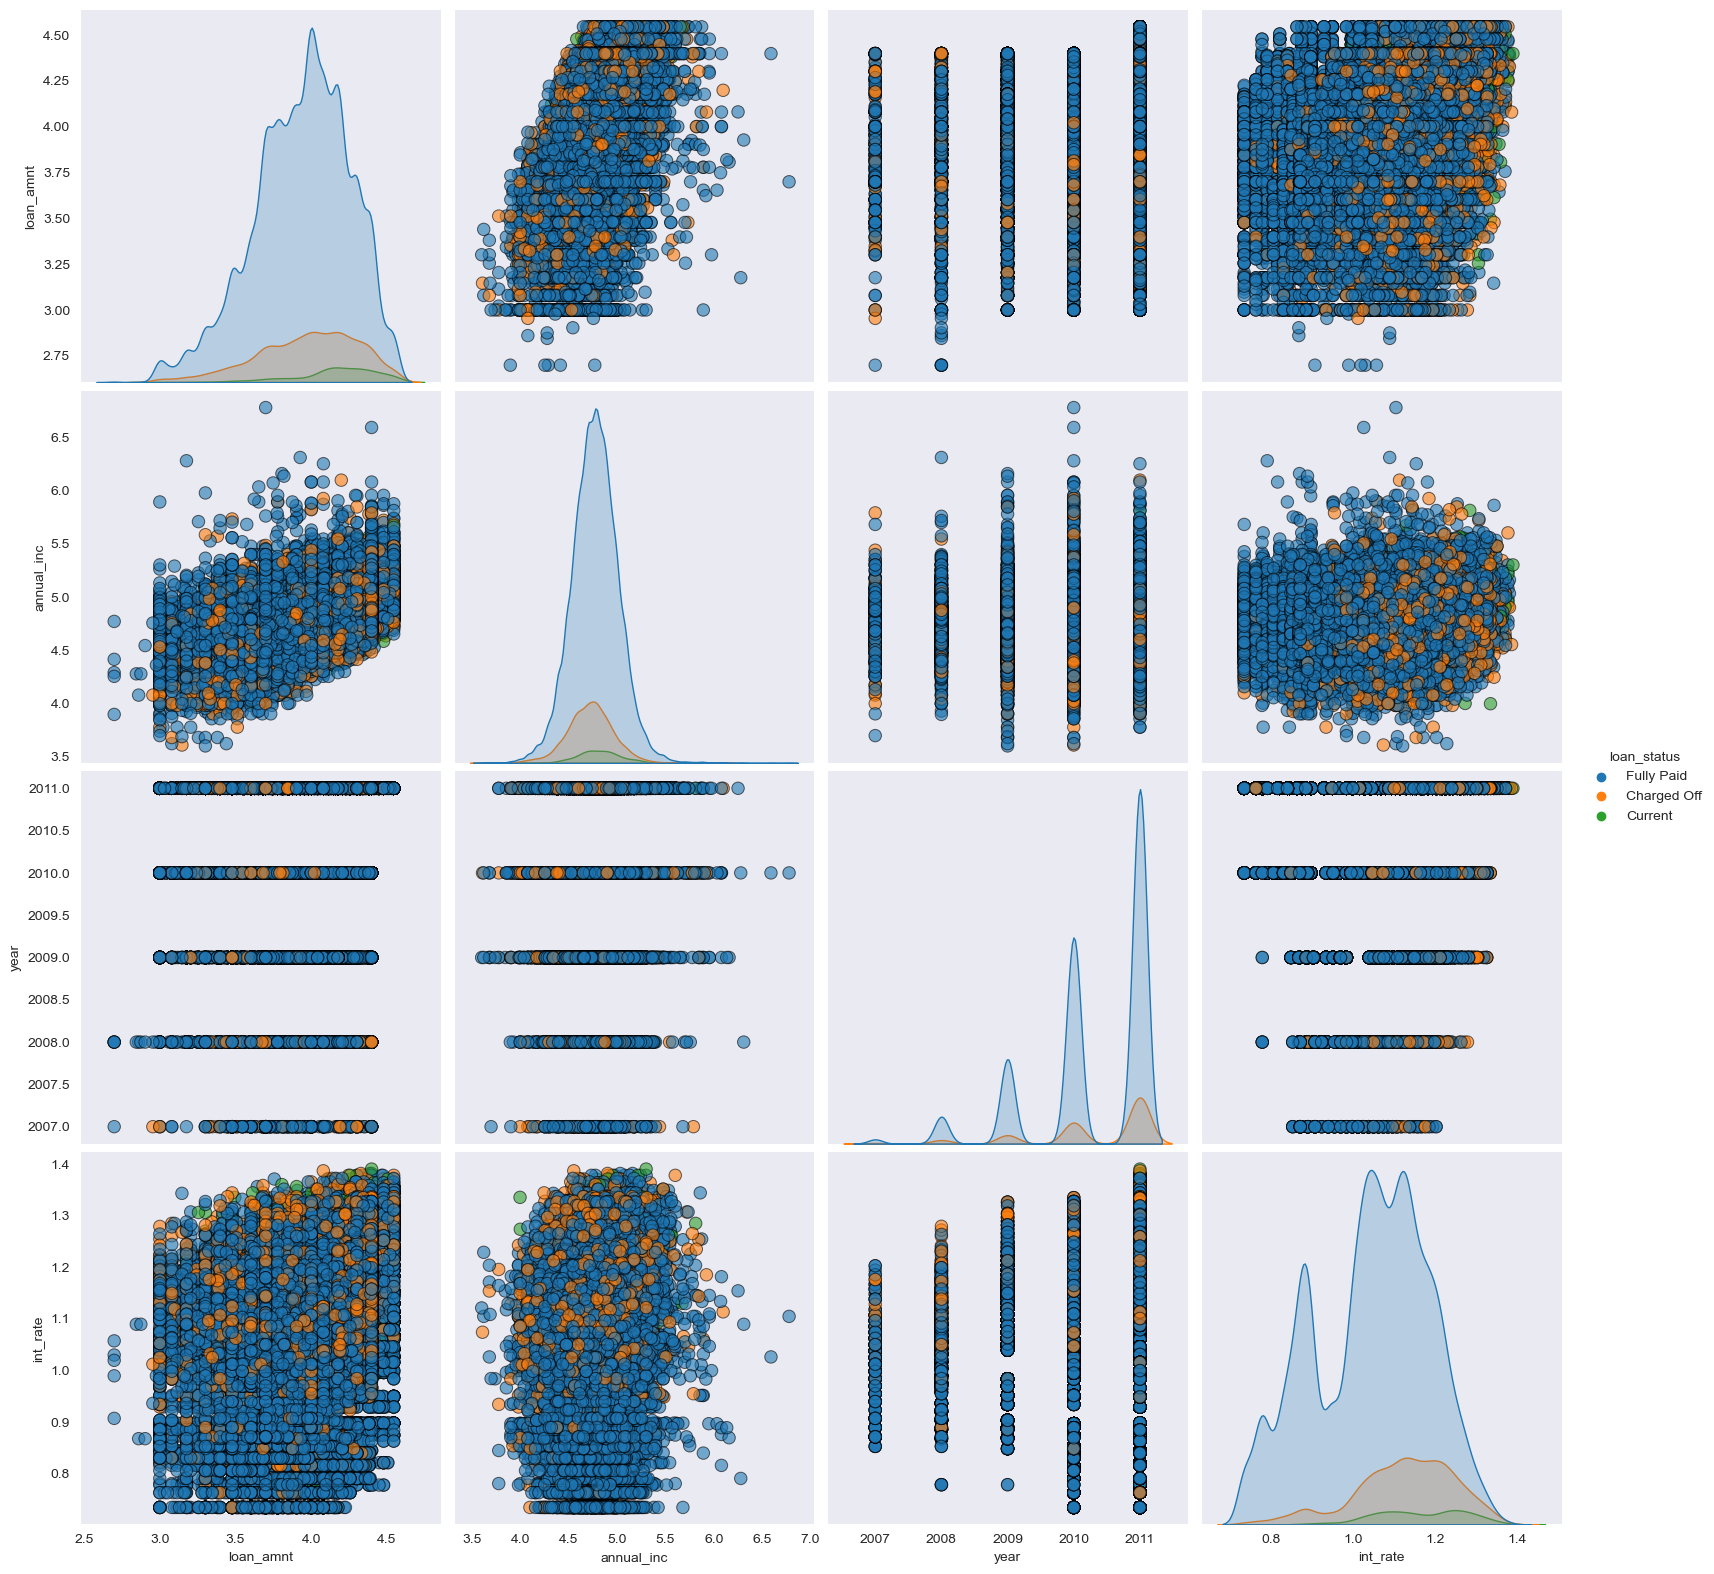

In [92]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan_data[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Observation:
Higher the interest rate higher charged off ratio
Higher the annual income higher the loan amount slightly.
Increase in number of charged off with increase in year.
Interest rate is increasing with loan amount increase